# Simple Autoencoder for MNIST
Here we attempt to reduce the dimensionality of each MNIST entry from 28*28 to 3 via an Autoencoder artificial neural network.

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True);

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [51]:
rate = 0.01
steps = 10000
batch_size = 256

architecture = (28*28, 50, 50, 3, 50, 50, 28*28)
number_layers = len(architecture)
middle_layer = number_layers//2
input_size = architecture[0]

In [52]:
X = tf.placeholder(tf.float32, shape=[None, input_size])

weights = []
biases = []

for input_size, output_size in zip(architecture, architecture[1:]):
    weights.append(tf.Variable(tf.random_normal([input_size, output_size])))
    biases.append(tf.Variable(tf.random_normal([output_size])))

def autoencode(x):
    encoding = x
    for W, b in zip(weights, biases):
        encoding = tf.nn.sigmoid(tf.add(tf.matmul(encoding, W), b))
    
    return encoding

def embed(x):
    embedding = x
    for W, b in zip(weights[:middle_layer], biases[:middle_layer]):
        embedding = tf.nn.sigmoid(tf.add(tf.matmul(embedding, W), b))
    
    return embedding
    

In [53]:
loss = tf.reduce_mean(tf.pow(X - autoencode(X), 2))
optimizer = tf.train.RMSPropOptimizer(rate).minimize(loss)

In [54]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    
    # TRAIN
    for i in range(steps):
        batch_x, _ = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_x})
        if i % 500 == 0:
            l = sess.run(loss, feed_dict={X: batch_x})
            print(f'Loss: {l}')
    
    # VISUALIZE
    lables = []
    originals = []
    coordinates = []
    finals = []
    
    for _ in range(100):
        batch_x, batch_y = mnist.test.next_batch(1)
        
        embedding, final = sess.run([embed(X), autoencode(X)], feed_dict={X: batch_x})
        
        lables.append(tf.argmax(batch_y[0]).eval())
        originals.append(batch_x[0])
        coordinates.append(embedding[0])
        finals.append(final[0])

Loss: 0.4149257242679596
Loss: 0.066929392516613
Loss: 0.05620747059583664
Loss: 0.051013100892305374
Loss: 0.048406463116407394
Loss: 0.0465262271463871
Loss: 0.04603483900427818
Loss: 0.04382539168000221
Loss: 0.04125303030014038
Loss: 0.043358590453863144
Loss: 0.04255278408527374
Loss: 0.041164688766002655
Loss: 0.0378941111266613
Loss: 0.04336951673030853
Loss: 0.03996020555496216
Loss: 0.04038707911968231
Loss: 0.04076576977968216
Loss: 0.03838224336504936
Loss: 0.03683668375015259
Loss: 0.03861811012029648


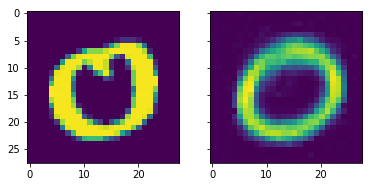

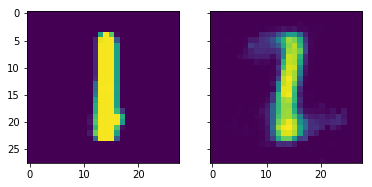

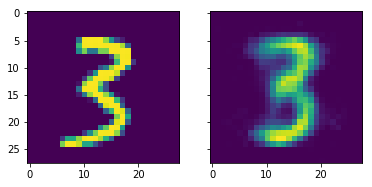

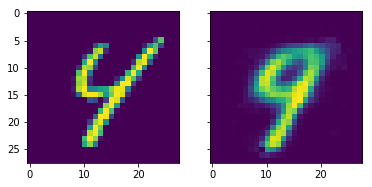

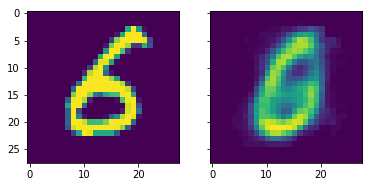

In [55]:
for original, final in zip(originals[:5], finals[:5]):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(original.reshape([28, 28]))
    ax2.imshow(final.reshape([28, 28]))
    plt.show()

## Visualize the embedding
Since all the information is now captured in 3 dimensions, we can visualize 100 random entries of the dataset in a plot as follows

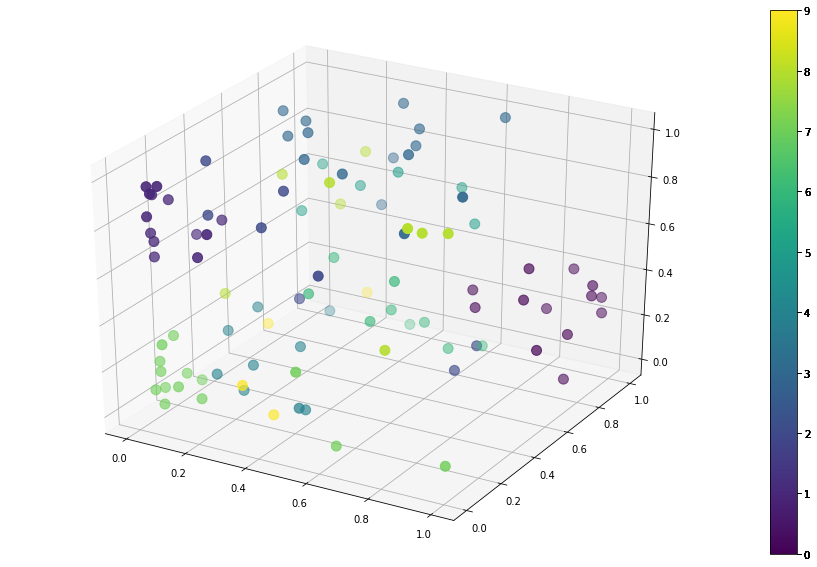

In [56]:
coordinates = np.array(coordinates)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], c=lables, s=100)

cb = plt.colorbar(scat, spacing='proportional',ticks=lables)